<a href="https://colab.research.google.com/github/shahulrashid/internship_tasks/blob/main/TASK_8_mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv("/content/drive/MyDrive/internship/Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
df.drop("CustomerID",axis=1,inplace=True)

In [7]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [11]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

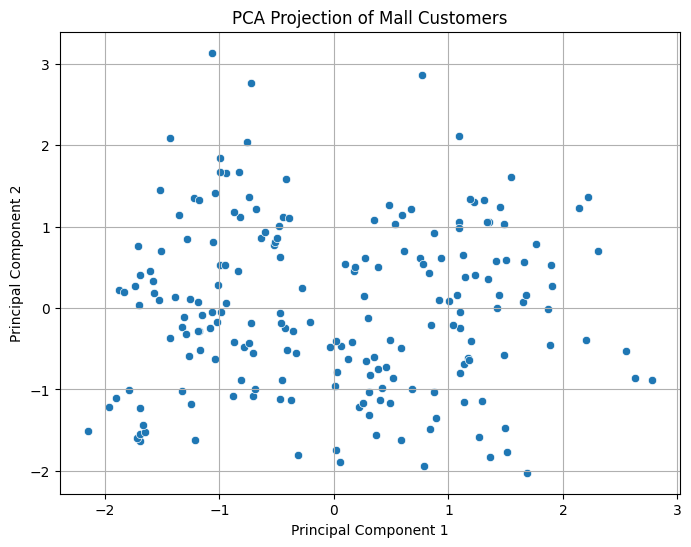

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1])
plt.title("PCA Projection of Mall Customers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [13]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

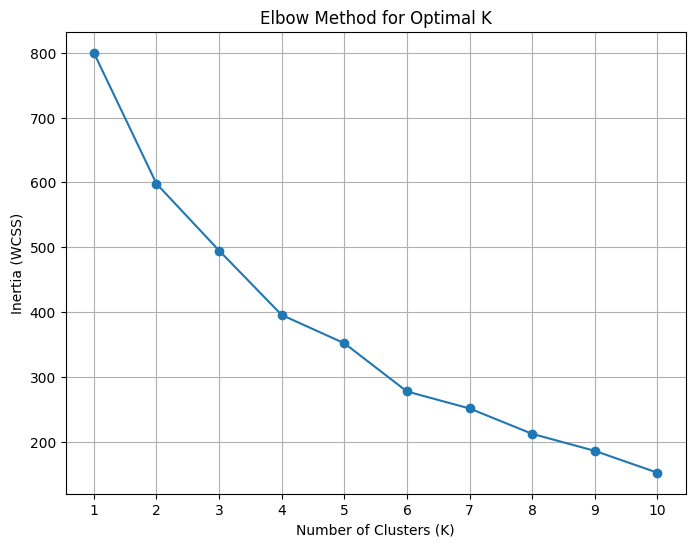

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [15]:
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(scaled_data)

In [16]:
df_clustered = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_clustered['Cluster'] = cluster_labels


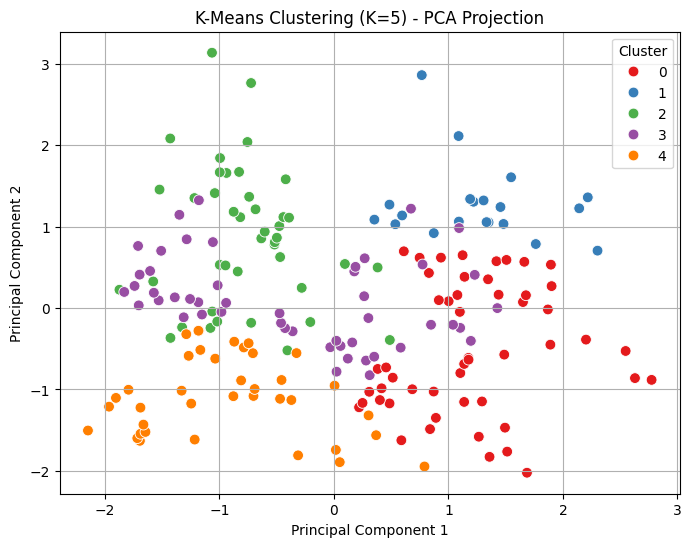

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clustered, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title("K-Means Clustering (K=5) - PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [18]:
sil_score = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.3f}")

Silhouette Score for K=5: 0.272


1. How does K-Means clustering work?
K-Means clustering is an unsupervised learning algorithm that partitions data into K distinct non-overlapping clusters based on feature similarity. It begins by randomly initializing K cluster centroids. Each data point is then assigned to the cluster whose centroid is closest, typically using Euclidean distance. Once all points are assigned, the centroids are updated to be the mean of the points in their respective clusters. This assignment and update process continues iteratively until the centroids no longer move significantly or a set number of iterations is reached, indicating convergence.

2. What is the Elbow method?
The Elbow method is a technique used to determine the optimal number of clusters (K) for K-Means clustering. It works by running K-Means for a range of K values and calculating the inertia (within-cluster sum of squared distances) for each. These values are then plotted against K. The "elbow" point on the curve, where the rate of decrease in inertia sharply changes, suggests the best balance between model simplicity and accuracy — beyond this point, adding more clusters yields diminishing returns.

3. What are the limitations of K-Means?
K-Means has several limitations. It assumes clusters are spherical and of similar size, which can lead to poor performance on data with irregular shapes or varying densities. It’s sensitive to outliers, which can significantly skew the centroids. The algorithm also requires the number of clusters K to be specified in advance, which may not always be known. Furthermore, it may converge to a local minimum depending on the initial centroid positions, leading to suboptimal results.

4. How does initialization affect results?
Initialization plays a crucial role in K-Means clustering. Poorly chosen initial centroids can lead the algorithm to converge to local optima rather than the global best solution. Different initializations can produce different clusterings for the same data. To address this, methods like K-Means++ are often used to select initial centroids in a smarter way, increasing the likelihood of achieving a better and more stable clustering result.

5. What is inertia in K-Means?
Inertia is a metric used in K-Means to evaluate how well the data has been clustered. It is defined as the sum of the squared distances between each data point and its assigned cluster centroid. Lower inertia indicates tighter clusters, which usually means better clustering. However, inertia always decreases as K increases, so it alone is not sufficient for choosing the best number of clusters — that’s where methods like the Elbow Method come in.

6. What is Silhouette Score?
The Silhouette Score is a metric used to measure the quality of clustering. It considers both intra-cluster cohesion and inter-cluster separation. For each data point, the score compares the average distance to points in the same cluster with the average distance to the nearest other cluster. The score ranges from -1 to 1, where values near 1 indicate that the point is well-matched to its cluster and poorly matched to neighboring clusters. A higher average silhouette score generally means better-defined clusters.

7. How do you choose the right number of clusters?
Choosing the right number of clusters involves balancing model complexity and clustering performance. Common techniques include the Elbow Method, which looks for a point of diminishing returns in the inertia plot, and the Silhouette Score, which favors the value of K with the highest average silhouette score. Domain knowledge and visual inspection (e.g., using PCA for 2D projection) can also aid in making this decision.

8. What’s the difference between clustering and classification?
Clustering and classification are both types of machine learning, but they serve different purposes. Clustering is an unsupervised learning technique that groups data based on similarity without using labeled outcomes — the algorithm discovers the inherent structure in data. Classification, on the other hand, is a supervised learning technique that learns from labeled data to predict predefined categories for new observations. In short, clustering finds patterns without labels, while classification relies on existing labels to make predictions